In [1]:
# 📘 Step 2: Data Preprocessing and EDA
# File: data_analytics.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv("../data/products.csv")

# Display first 5 rows
df.head()


,uniq_id,title,brand,description,price,categories,images,manufacturer,package_dimensions,country_of_origin,material,color
0,PROD-1001,OakStone Plastic Wardrobe,OakStone,A stylish wardrobe made from premium plastic i...,23588.58,Wardrobe,https://picsum.photos/200?random=1,CraftedCo,115x186x62 cm,Germany,Plastic,Black
1,PROD-1002,OakStone Plastic Wardrobe,OakStone,A stylish wardrobe made from premium plastic i...,8945.16,Wardrobe,https://picsum.photos/200?random=2,FurniMakers Ltd.,168x41x160 cm,Germany,Plastic,Blue
2,PROD-1003,ComfyCasa Wood Wardrobe,ComfyCasa,A stylish wardrobe made from premium wood in b...,17321.49,Wardrobe,https://picsum.photos/200?random=3,UrbanWorks,94x134x152 cm,Italy,Wood,Beige
3,PROD-1004,HomeLuxe Wood Wardrobe,HomeLuxe,A stylish wardrobe made from premium wood in w...,21140.06,Wardrobe,https://picsum.photos/200?random=4,CasaFurnish,64x66x153 cm,Italy,Wood,White
4,PROD-1005,FurniCraft Glass Sofa,FurniCraft,A stylish sofa made from premium glass in grey...,14272.43,Sofa,https://picsum.photos/200?random=5,FurniMakers Ltd.,30x121x183 cm,India,Glass,Grey


In [2]:
# Check missing values
df.isnull().sum()

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Check data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uniq_id             50 non-null     object 
 1   title               50 non-null     object 
 2   brand               50 non-null     object 
 3   description         50 non-null     object 
 4   price               50 non-null     float64
 5   categories          50 non-null     object 
 6   images              50 non-null     object 
 7   manufacturer        50 non-null     object 
 8   package_dimensions  50 non-null     object 
 9   country_of_origin   50 non-null     object 
 10  material            50 non-null     object 
 11  color               50 non-null     object 
dtypes: float64(1), object(11)
memory usage: 4.8+ KB


In [3]:
# Describe numeric data
df.describe()

# Unique categories
print("Unique product categories:", df["categories"].unique())

# Count of products by category
df["categories"].value_counts()


Unique product categories: ['Wardrobe' 'Sofa' 'Chair' 'Dining Set' 'Bed' 'Table' 'Bookshelf']


categories
Wardrobe      13
Chair          7
Bed            7
Table          7
Dining Set     6
Bookshelf      6
Sofa           4
Name: count, dtype: int64

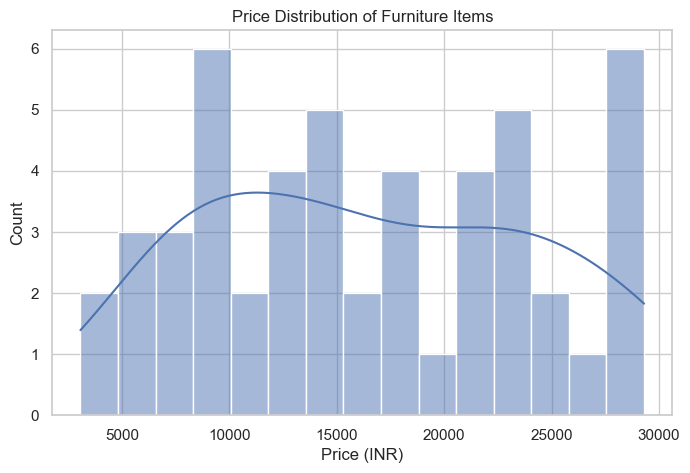

C:\Users\Rohan Taneja\AppData\Local\Temp\ipykernel_72140\3453883267.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="categories", palette="viridis")


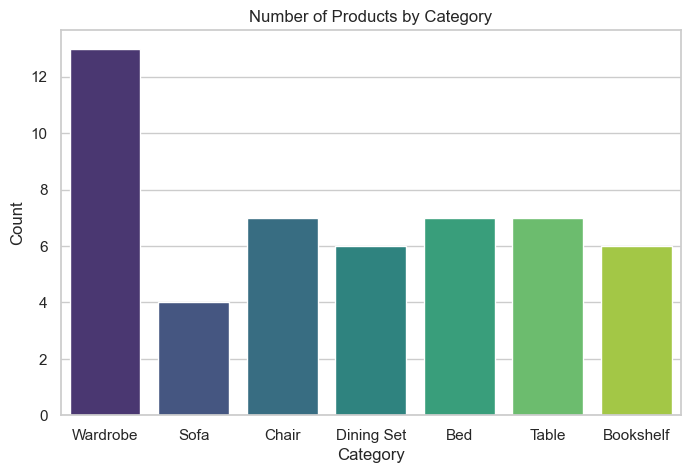

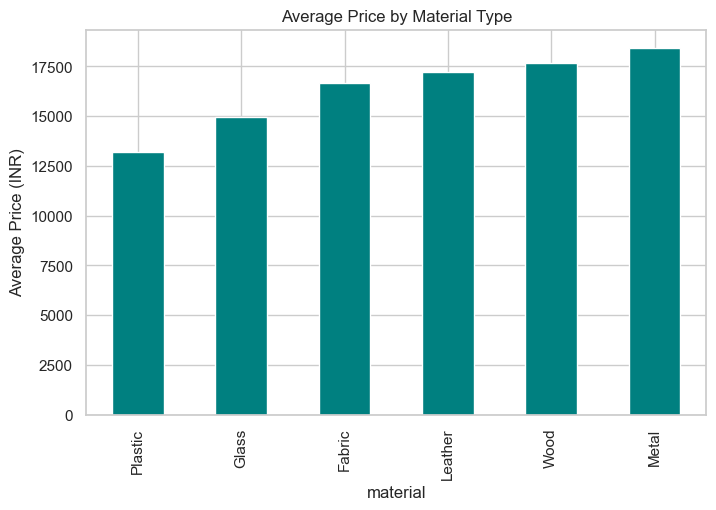

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=15, kde=True)
plt.title("Price Distribution of Furniture Items")
plt.xlabel("Price (INR)")
plt.ylabel("Count")
plt.show()

# Products by category
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="categories", palette="viridis")
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Average price by material
plt.figure(figsize=(8,5))
avg_price = df.groupby("material")["price"].mean().sort_values()
avg_price.plot(kind="bar", color="teal")
plt.title("Average Price by Material Type")
plt.ylabel("Average Price (INR)")
plt.show()


In [5]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text)  # remove extra spaces
    return text.strip()

df["clean_description"] = df["description"].apply(clean_text)
df.head()[["description", "clean_description"]].head()


,description,clean_description
0,A stylish wardrobe made from premium plastic i...,a stylish wardrobe made from premium plastic i...
1,A stylish wardrobe made from premium plastic i...,a stylish wardrobe made from premium plastic i...
2,A stylish wardrobe made from premium wood in b...,a stylish wardrobe made from premium wood in b...
3,A stylish wardrobe made from premium wood in w...,a stylish wardrobe made from premium wood in w...
4,A stylish sofa made from premium glass in grey...,a stylish sofa made from premium glass in grey...


In [6]:
df.to_csv("../data/clean_products.csv", index=False)
print("✅ Cleaned data saved as clean_products.csv")


✅ Cleaned data saved as clean_products.csv
